In [1]:
import numpy as np
import src.util as utils
import importlib
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
importlib.reload(utils)

<module 'src.util' from 'c:\\Users\\marwi\\OneDrive - Universität Potsdam\\Intro_to_ML\\temp\\uib-machine-learning\\assignment-2\\src\\util.py'>

In [2]:
X = np.load("./data/emnist_hex_images.npy")
y = np.load("./data/emnist_hex_labels.npy")

In [5]:
# Splitting of Dataset
X_sampled, _, y_sampled, _ = train_test_split(X, y, stratify=y, random_state=42)

# Preprocessing step: Flattening of images to a 1D Array
X_flattened = X_sampled.reshape(X_sampled.shape[0], -1)

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y_sampled, test_size=0.2, random_state=42)

In [6]:
# Preprocess the data (scaling and dimensionality reduction with PCA)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the CNN
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, solver='adam', random_state=42)
clf.fit(X_train, y_train)

MLPClassifier(random_state=42)

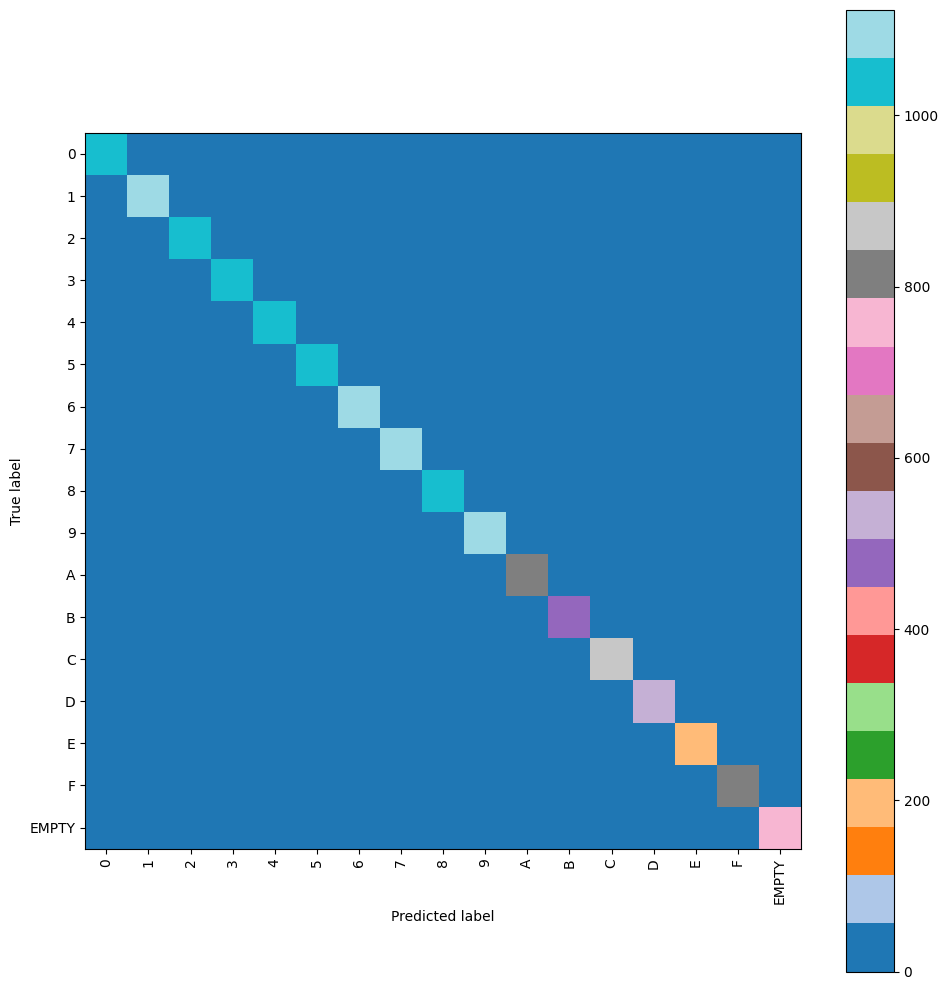

In [8]:
# Generate predictions on the test data
y_pred = clf.predict(X_test)
# Generate the confusion matrix with the utils function
mlp_cm = confusion_matrix(y_test, y_pred)
utils.generate_confusion_matrix(mlp_cm, "confusion_matrix_MLP", y_test)

In [9]:
from sklearn.metrics import accuracy_score
from src.util import generate_confusion_matrix
# Make predictions using the trained classifier
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9392740090285078
